# MobileDNA

## voorbereiding

### importeren: data inladen

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
sns.set();
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas

### dataset inladen tot dataframe

In [2]:
app_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_appevents.csv"
notif_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/data/floor/floor_notifications.csv"

In [3]:
df = pd.read_csv(app_filename, sep=";", parse_dates=['startTime', 'endTime'])
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101531 entries, 0 to 101530
Data columns (total 14 columns):
ppn                101531 non-null int64
application        101531 non-null object
battery            101531 non-null float64
data_version       101531 non-null float64
endTime            101531 non-null datetime64[ns]
endTimeMillis      101531 non-null object
id                 101531 non-null object
latitude           101531 non-null object
longitude          101531 non-null object
model              101531 non-null object
notification       101531 non-null bool
session            101531 non-null int64
startTime          101531 non-null datetime64[ns]
startTimeMillis    101531 non-null object
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 10.2+ MB


#### drop duplicates

In [4]:
pd.concat(g for _, g in df.groupby(["startTime","application","endTime"]) if len(g) > 1)

df = df.drop_duplicates(["startTime","application","endTime"])

In [5]:
df

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,"1,54153E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525474,2018-11-06 18:31:16.853,"1,54153E+12"
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,"1,54153E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525645,2018-11-06 18:34:08.065,"1,54153E+12"
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,"1,54162E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:24:54.966,"1,54162E+12"
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,"1,54162E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:38:10.092,"1,54162E+12"
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,"1,54163E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541628241,2018-11-07 23:04:03.090,"1,54163E+12"
5,1,com.android.chrome,70.0,1.4,2018-11-07 23:28:53.999,"1,54163E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541629375,2018-11-07 23:23:28.765,"1,54163E+12"
6,1,com.facebook.orca,30.0,1.4,2018-11-06 21:58:04.983,"1,54154E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,True,1541537471,2018-11-06 21:57:14.410,"1,54154E+12"
7,1,com.google.android.apps.maps,100.0,1.4,2018-11-08 11:14:40.036,"1,54167E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541671868,2018-11-08 11:13:02.217,"1,54167E+12"
8,1,com.android.mms,84.0,1.4,2018-11-08 15:50:29.439,"1,54169E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541688603,2018-11-08 15:50:14.048,"1,54169E+12"
9,1,com.facebook.katana,84.0,1.4,2018-11-08 15:50:34.876,"1,54169E+12",8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541688603,2018-11-08 15:50:34.490,"1,54169E+12"


Hoeveel van de participanten waarbij de Qualtrics vragenlijst vervuld is:
<ul>
<li> Hebben ook MobileDNA data gelogd? Uitval?</li>
<li> Geslachtsverdeling van MobileDNA data? </li>
<li> Leeftijdsverdeling van MobileDNA data? </li>
<li> IQverdeling van MobileDNA data? </li>
</ul>

## Gemiddelde objectieve gebruik tijdens week/weekend
in minuten

Definiëren van de data = week en data = weekend <br>
Deze vormen nu twee blokken waaraan de data wordt toegekend. 

Daarna specifieke dataset maken die "ppn", "gemiddelde gebruik week", "gemiddelde gebruik weekend"

Deze dataset omzetten naar long format: (1) kolom "ppn", (2) kolom "minutesàday", (3) kolom "moment"

visualiseren als line plot: gebruik (y) per participant (x), per moment(hue)

In [ ]:
visualiseren als heatmap: moment (y) per participant (x), gebruik(hue)

In [ ]:
Over alle participanten heen bekijjken. <br>
x = "moment", y = "minutesàday" (catplot; kind = point/swarm/bar/boxen)

## Objectieve piekgebruik 

Dezelfde blokken moeten gebruikt worden zoals bij de subjectieve vragenlijst

In [7]:
df_uren = df['startTime'].dt.hour.value_counts().to_frame()
df_uren.to_excel("df_uur.xlsx")

#23U-5U: 3992 + 2938 + 1462 + 980 + 622 + 301 = 10295
#5U-9U: 175 + 526 +1639 + 3233 = 5573
#9U-12U: 4102 + 5135 + 5459 = 14696
#12U-13U: 5212
#13U-18U: 6037+6382+5809+5717+6534 = 30479
#18U-23U: 6561+6681+6589+5825+4978 = 30634

#TOT: 96 889

In [8]:
piekgebruikU = pd.read_excel("C:/Users/beheerder/df_uur.xlsx")
piekgebruikU

,startTime
19,6681
20,6589
18,6561
17,6534
14,6382
12,6212
13,6037
21,5825
15,5809
16,5717


Plotten piekgebruik (aantal appevents/proportie appevents)

##### lineplot (aantal/proportie)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

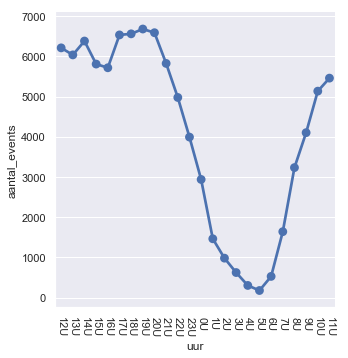

In [109]:
sns.catplot(x = "uur", y="aantal_events", kind = "point", data= piekgebruikU)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

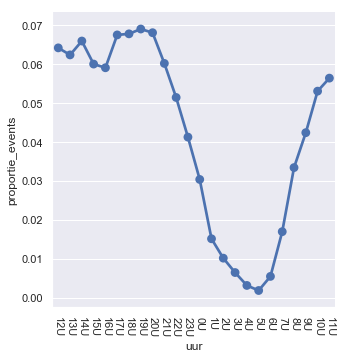

In [110]:
sns.catplot(x = "uur", y="proportie_events", kind = "point", data= piekgebruikU)
plt.xticks(rotation=-90)

In [58]:
piekgebruikCat = piekgebruikU.groupby(["categorie"]).sum()
piekgebruikCat["moment"] = ["12U-13U", "13U-18U", "18U-23U", "23U-5U", "5U-9U", "9U-12U"]

##### visualiseren volgens categorie

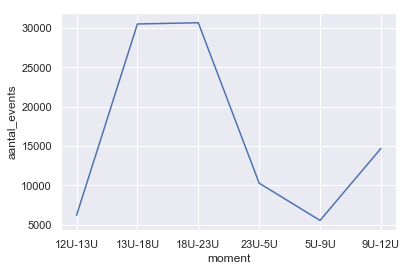

In [111]:
sns.lineplot(x= "moment", y="aantal_events", data=piekgebruikCat)

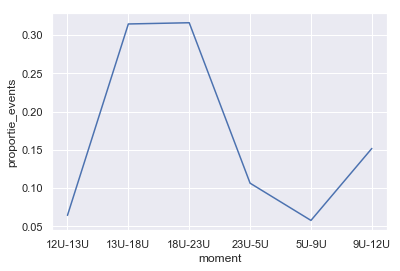

In [112]:
sns.lineplot(x="moment", y="proportie_events", data=piekgebruikCat)

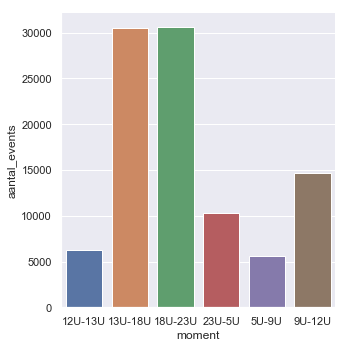

In [113]:
sns.catplot(x= "moment", y="aantal_events", kind="bar", data=piekgebruikCat)

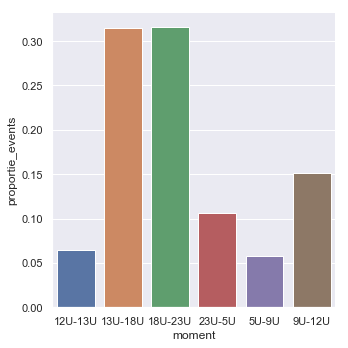

In [114]:
sns.catplot(x= "moment", y="proportie_events", kind="bar", data=piekgebruikCat)

Hier gaat het dus over de proportie van applicatie-events tijdens een bepaalde periode. 

In [9]:
cache_path = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/"
app_dict = np.load(cache_path + "app_dict.npy").item()

In [10]:
# Apps categoriseren met script Wouter, licht aangepast
def annotate(df: pd.DataFrame, app_dict: dict, type:str, lookup=False) -> (pd.DataFrame, dict):
    """Annotate virgin data with duration, app meta data."""

    # Does the data frame contain an application column? If not, bugger off.
    if "application" not in df:
        raise Exception("Need an application column to be able to annotate")

    # If lookup is set to True, update app data base, otherwise work locally
    if lookup:
        update_app_meta(df=df, app_dict=app_dict)

    # Store unclassified apps, and how much they occur
    unclassified = {}

    # Subroutine to get genre
    def get_genre_id(row):
        try:
            genre = app_dict[row['application']]['genre_id']
        except:
            genre = 'unknown'
        return genre

    # Subroutine to get app name (no spaces)
    def get_app_name(row, sep="_"):
        try:
            name = app_dict[row['application']]['app_name'].replace(" ", sep)
        except:
            name = 'unknown'
            if row['application'] in unclassified:
                unclassified[row['application']] += 1
            else:
                unclassified[row['application']] = 1
        return name

    # Annotate actual data frame
    try:
        df['app_genre_id'] = df.apply(lambda row: get_genre_id(row), axis=1)
        df['app_name'] = df.apply(lambda row: get_app_name(row), axis=1)
    except Exception as e:
        print("Annotations failed! - ", e)

    return df, unclassified

In [11]:
df_new, unclassified = annotate(df, app_dict=app_dict, type="appevents", lookup=False)
df_new['datum'] = df_new['startTime'].dt.date
df_new['duur'] = (df_new['endTimeMillis'] - df_new['startTimeMillis']) / 1000
#dit deeltje werkt voorlopig dus niet. 

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
df_new

In [12]:
# Gemiddeld gebruik per moment: aantal appevents per blok, aantal unieke sessies per bok
(df.groupby(['ppn', 'uurblok'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))

df_TOTUSE = (df.groupby(['ppn'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))
df_piek = (df.groupby(['ppn', 'uurblok'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))
df_TOTUSE

KeyError: 'uurblok'

In [76]:
df_piek

,appevents,un_sessions
ppn,,
1,920,385
2,2915,580
3,2464,860
4,2535,519
5,3697,1434
6,2831,898
8,2921,562
9,1797,692
10,3667,1292


In [77]:
df_piek.index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 42, 43], ['24U-5U', '5U-9U', '9U-12U', '12U-13U', '13U-18U', '18U-23U']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34

In [79]:
df_piek['ppn'] = [1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6,6, 8,8,8,8,8,8, 9,9,9,9,9,9, 10, 10,10,10,10,10,
       11,11,11,11,11,11, 12,12,12,12,12,12, 13,13,13,13,13,13, 14,14,14,14,14,14, 15,15,15,15,15,15, 16,16,16,16,16,16, 17,17,17,17,17,17, 18, 18,18,18,18,18,
       19,19,19,19,19,19, 21,21,21,21,21,21, 22,22,22,22,22,22, 23,23,23,23,23,23, 24,24,24,24,24,24, 25, 25,25,25,25,
       26,26,26,26,26,26, 27,27,27,27,27,27, 28,28,28,28,28,28, 29,29,29,29,29,29, 31,31,31,31, 32, 32,32,32,32,32,
       33,33,33,33,33,33, 34,34,34,34,34,34, 35, 35,35,35,35,35,36,36,36,36,36,36, 38, 38,38,38,38,38,39,39,39,39,39,39,
       42, 42,42,42,43,43,43,43,43,43]
df_piek['blok'] = ['[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
        '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
         '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]', '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
         '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
         '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]',
         '[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]','[23h - 5h]', '[5h - 9h]', '[9h - 12h]', '[12h - 13h]', '[13h - 18h]', '[18h-23h]']
df_piek

appevents  un_sessions  ppn         blok
ppn uurblok                                          
1   24U-5U          10            6    1   [23h - 5h]
    5U-9U           78           21    1    [5h - 9h]
    9U-12U         144           74    1   [9h - 12h]
    12U-13U         34           17    1  [12h - 13h]
    13U-18U        353          147    1  [13h - 18h]
    18U-23U        263          113    1    [18h-23h]
2   24U-5U          91           11    2   [23h - 5h]
    5U-9U          547           88    2    [5h - 9h]
    9U-12U         345           64    2   [9h - 12h]
    12U-13U        148           43    2  [12h - 13h]
    13U-18U        706          139    2  [13h - 18h]
    18U-23U        872          203    2    [18h-23h]
3   24U-5U         170           44    3   [23h - 5h]
    5U-9U          340          108    3    [5h - 9h]
    9U-12U         300          124    3   [9h - 12h]
    12U-13U        125           46    3  [12h - 13h]
    13U-18U        726          267    3  [13h - 18h]
    18U-23U        613          248    3    [18h-23h]
4   24U-5U          34           11    4   [23h - 5h]
    5U-9U          438           90    4    [5h - 9h]
    9U-12U         530           91    4   [9h - 12h]
    12U-13U         71           24    4  [12h - 13h]
    13U-18U        587          145    4  [13h - 18h]
    18U-23U        799          150    4    [18h-23h]
5   24U-5U         346          132    5   [23h - 5h]
    5U-9U          242           85    5    [5h - 9h]
    9U-12U         489          166    5   [9h - 12h]
    12U-13U        196           71    5  [12h - 13h]
    13U-18U       1150          439    5  [13h - 18h]
    18U-23U       1129          475    5    [18h-23h]
...                ...          ...  ...          ...
35  13U-18U        452          224   35  [13h - 18h]
    18U-23U        400          212   35    [18h-23h]
36  24U-5U          83           36   36   [23h - 5h]
    5U-9U          475          199   36    [5h - 9h]
    9U-12U         825          327   36   [9h - 12h]
    12U-13U        277           89   36  [12h - 13h]
    13U-18U       1420          543   36  [13h - 18h]
    18U-23U       1093          424   36    [18h-23h]
38  24U-5U         101           62   38   [23h - 5h]
    5U-9U          447          230   38    [5h - 9h]
    9U-12U         525          191   38   [9h - 12h]
    12U-13U        226          102   38  [12h - 13h]
    13U-18U        918          338   38  [13h - 18h]
    18U-23U        967          419   38    [18h-23h]
39  24U-5U          30           11   39   [23h - 5h]
    5U-9U          190           62   39    [5h - 9h]
    9U-12U         207           62   39   [9h - 12h]
    12U-13U        126           30   39  [12h - 13h]
    13U-18U        846          195   39  [13h - 18h]
    18U-23U       1055          152   39    [18h-23h]
42  9U-12U          26            5   42   [9h - 12h]
    12U-13U         12            6   42  [12h - 13h]
    13U-18U         24           12   42  [13h - 18h]
    18U-23U         69           22   42    [18h-23h]
43  24U-5U          94           46   43   [23h - 5h]
    5U-9U           24            9   43    [5h - 9h]
    9U-12U         148           51   43   [9h - 12h]
    12U-13U         48           31   43  [12h - 13h]
    13U-18U        405          191   43  [13h - 18h]
    18U-23U        366          185   43    [18h-23h]

[217 rows x 4 columns]

HIER NOG VERDER AAN WERKEN.

In [ ]:
#change from long to wide 
df_piek_wide = df_piek.pivot(index= 'ppn', columns='blok', values = 'appevents')
df_piek_wide.columns = ['appevents_[12u-13u]', 'appevents_[13u-18u]', 'appevents_[18u-23u]', 'appevents_[23u-5u]', 'appevents_[5u-9u]', 'appevents_[9u-12u]']
df_piek_wide = df_piek_wide[['appevents_[23u-5u]', 'appevents_[5u-9u]', 'appevents_[9u-12u]','appevents_[12u-13u]', 'appevents_[13u-18u]', 'appevents_[18u-23u]']]
df_piek_wide.transpose().plot(title='appevents/moment of day').legend().set_visible(False)

##nu ook un_sessions wide krijgen en dan aan elkaar plakken. 
df_piek_wide_unses = df_piek.pivot(index= 'ppn', columns='blok', values = 'un_sessions')
df_piek_wide_unses.columns = ['uniqueses_[12u-13u]', 'uniqueses_[13u-18u]', 'uniqueses_[18u-23u]', 'uniqueses_[23u-5u]', 'uniqueses_[5u-9u]', 'uniqueses_[9u-12u]']
df_piek_wide_unses = df_piek_wide_unses[['uniqueses_[23u-5u]', 'uniqueses_[5u-9u]', 'uniqueses_[9u-12u]','uniqueses_[12u-13u]', 'uniqueses_[13u-18u]', 'uniqueses_[18u-23u]']]
df_piek_wide_unses.transpose().plot(title='unique sessions/moment of day').legend().set_visible(False)

df_piek_wide_2 = pd.concat([df_piek_wide, df_piek_wide_unses], axis=1)
rel_piek_wide = pd.concat([df_TOTUSE], axis=1)

In [ ]:
Dit vergelijken met wat ze per participant aangeven als de belangrijkste momenten waarop zij werken.<br>
Nagaan of dit dan in lijn ligt met elkaar. 

In [ ]:
#deze mag je nu gaan opslaan. 

df_piek_wide_2.to_csv('piekgebruikabs.csv')
df_piek_wide_2.to_excel('piekgebruikabs.xlsx')
rel_piek_wide.to_excel('piekgebruiktot.xlsx')
#deze twee werden nu samengezet om proportioneel te kunnen kijken.
df_piek_wide = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/piekgebruikabs_rel.xlsx')
sns.lmplot(x='appevents',y='un_sessions', data=df_piek_wide)
sns.boxplot(data=df_piek_wide[['appevents', 'un_sessions']])
sns.distplot(df_piek_wide.appevents)
sns.distplot(df_piek_wide.un_sessions)
sns.catplot(x="blok", y="appevents", data=df_piek_wide)

sns.catplot(data=df_piek_wide, orient="h", kind="box")
#nog een paar visualisaties van seaborn proberen. 
df_piek_long_app_events = df_piek_wide
df_piek_long_uniq_ses = df_piek_wide
df_piek_long_app_events = pd.melt(df_piek_long_app_events, id_vars="ppn", value_vars =['appevents_[23u-5u]', 'appevents_[5u-9u]', 'appevents_[9u-12u]','appevents_[12u-13u]', 'appevents_[13u-18u]', 'appevents_[18u-23u]'])
df_piek_long_uniq_ses = pd.melt(df_piek_long_uniq_ses, id_vars="ppn", value_vars =['uniqueses_[23u-5u]', 'uniqueses_[5u-9u]', 'uniqueses_[9u-12u]','uniqueses_[12u-13u]', 'uniqueses_[13u-18u]', 'uniqueses_[18u-23u]'])

sns.catplot(x="variable", y="value", data=df_piek_long_app_events)
#rotate the x-labels to bekomen readable. 
plt.xticks(rotation=-90)

sns.catplot(x="variable", y="value", kind="bar",  data=df_piek_long_app_events)
plt.xticks(rotation=-90)

sns.boxplot(x="variable", y="value",data=df_piek_long_app_events, width=0.5, palette="colorblind")
plt.xticks(rotation=-90)

###Unique sessions
sns.catplot(x="variable", y="value", data=df_piek_long_uniq_ses)
#rotate the x-labels to bekomen readable. 
plt.xticks(rotation=-90)

sns.catplot(x="variable", y="value", kind="bar",  data=df_piek_long_uniq_ses)
plt.xticks(rotation=-90)


sns.boxplot(x="variable", y="value",data=df_piek_long_uniq_ses, width=0.5, palette="colorblind")
plt.xticks(rotation=-90)

#kun je deze nu naast elkaar zetten via barplot en boxplot? 
data1 = df_piek_long_app_events.assign(focus="app_events")
data2 = df_piek_long_uniq_ses.assign(focus="unique sessions")
bxplt = pd.concat([data1, data2])
sns.boxplot(x="variable", y="value", hue="focus", data=bxplt)

sns.catplot(x="variable", y="value", hue="focus", kind="bar",  data=bxplt)
plt.xticks(rotation=-90)

## objectieve appgebruik

##### Over alle participanten heen

In [13]:
df_MGA_alg = df_new.groupby(['ppn','datum'])['app_genre_id'].value_counts().groupby(['app_genre_id']).mean()
df_MGA_alg = df_MGA_alg.to_frame()
#wat is die lege applicatie? 

Dit zijn dus de applicaties die eruitgehaald kunnen worden in het algemeen. 

Deze applicaties kunnen dus eerst eens gevisualiseerd worden en daarna gegroepeerd zodat deze in lijn liggen met de gebruikte applicaties in de vragenlijst om hun appgebruik te rapporteren. <br>
<ul>
<li>INTERNET/ZOEK</li>
<li>MESSENGERS</li>
<li>SNS</li>
<li>ENTERTAIN</li>
<li>GAMES</li>
<li>ANDERE</li>
</ul>

In [14]:
df_MGA_alg.columns = ['mean app events/dag']
df_MGA_alg.sum()

mean app events/dag    244.197692
dtype: float64

In [15]:
df_MGA_alg["proportie"] = df_MGA_alg["mean app events/dag"]/244.198
df_MGA_alg["APP"] = ["","COMMUNICATION", "ENTERTAINMENT", "FINANCE", "GAME_ARCADE", "HEALTH_AND_FITNESS", "LIFESTYLE","MAPS_AND_NAVIGATION", "MUSIC_AND_AUDIO", "NEWS_AND_MAGAZINES",
                    "PHOTOGRAPHY", "PRODUCTIVITY", "SHOPPING", "SOCIAL", "SPORTS", "TOOLS", "TRAVEL_AND_LOCAL", "VIDEO_PLAYERS", "unknown"]
df_MGA_alg

,mean app events/dag,proportie,APP
app_genre_id,,,
,7.517857,0.030786,
COMMUNICATION,38.497336,0.157648,COMMUNICATION
ENTERTAINMENT,7.230769,0.029610,ENTERTAINMENT
FINANCE,2.946667,0.012067,FINANCE
GAME_ARCADE,1.000000,0.004095,GAME_ARCADE
HEALTH_AND_FITNESS,2.428571,0.009945,HEALTH_AND_FITNESS
LIFESTYLE,3.968379,0.016251,LIFESTYLE
MAPS_AND_NAVIGATION,4.681319,0.019170,MAPS_AND_NAVIGATION
MUSIC_AND_AUDIO,15.203620,0.062259,MUSIC_AND_AUDIO


###### Dit visualiseren: line-pointplot, factorplot 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

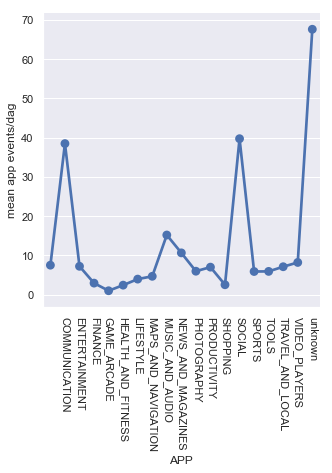

In [116]:
sns.catplot(x= "APP", y="mean app events/dag", kind ="point",data=df_MGA_alg, markers='o')
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

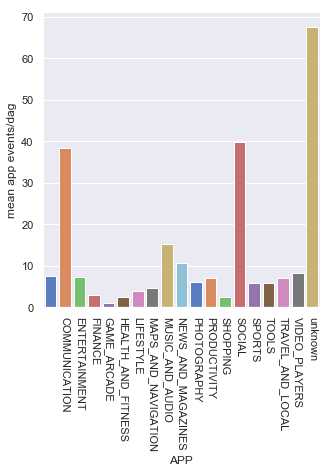

In [120]:
sns.catplot(x= "APP", y="mean app events/dag", kind ="bar",palette="muted",data=df_MGA_alg)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

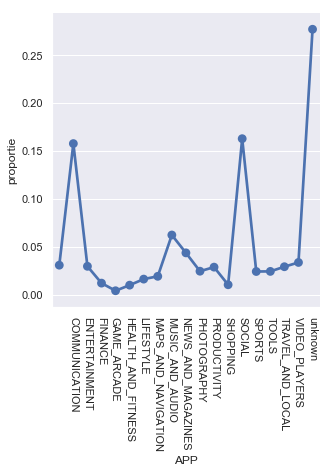

In [119]:
sns.catplot(x= "APP", y="proportie", kind ="point",data=df_MGA_alg, markers='o')
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

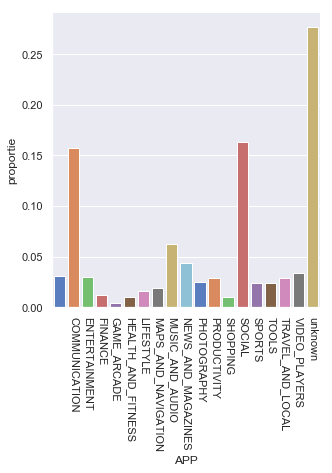

In [121]:
sns.catplot(x= "APP", y="proportie", kind ="bar",data=df_MGA_alg,palette="muted")
plt.xticks(rotation=-90)

##### in nieuwe applicatiecategorieën indelen 

Hoe dit doen?

###### Dit visualiseren

##### Per participant

Dit kan nu gekoppeld worden met wat ze zelf aangeven (als we weten op welke manier ze kunnen toekennen tot de nieuwe applicatiecategorieën).

In [26]:
df_MGA = df_new.groupby(['ppn','datum'])['app_genre_id'].value_counts().groupby(['ppn','app_genre_id']).mean()
df_MGA = df_MGA.to_frame()
df_MGA.columns = ['mean app events/dag']
df_MGA = df_MGA.reset_index()
df_MGA

,ppn,app_genre_id,mean app events/dag
0,1,COMMUNICATION,5.875000
1,1,LIFESTYLE,31.111111
2,1,PHOTOGRAPHY,7.666667
3,1,PRODUCTIVITY,1.000000
4,1,SOCIAL,8.000000
5,1,TOOLS,1.333333
6,1,TRAVEL_AND_LOCAL,2.750000
7,1,VIDEO_PLAYERS,2.000000
8,1,unknown,19.944444
9,2,,1.400000


In [27]:
df_MGA_anders = df_new.groupby(['ppn'])['app_genre_id'].value_counts() / df_new.groupby(['ppn'])['datum'].nunique()
df_MGA_anders = df_MGA_anders.to_frame()
df_MGA_anders.columns = ['mean app events/dag']
df_MGA_anders = df_MGA_anders.reset_index()
df_MGA_anders

,ppn,app_genre_id,mean app events/dag
0,1,unknown,19.944444
1,1,LIFESTYLE,15.555556
2,1,SOCIAL,8.000000
3,1,COMMUNICATION,5.222222
4,1,PHOTOGRAPHY,1.277778
5,1,TRAVEL_AND_LOCAL,0.611111
6,1,TOOLS,0.222222
7,1,VIDEO_PLAYERS,0.222222
8,1,PRODUCTIVITY,0.055556
9,2,unknown,108.928571


Hier nog verder aan werken. 

Twee verschillende manieren van hierboven in dataframe plaatsen <br>
<ul>
    <li> Aantal dagen een categorie gelogd: #dcatgelogd </li>
    <li> Totale aantal dagen gelogd: tot#dgelogd </li>
</ul>

In [43]:
df_MGA = df_MGA.assign(focus="#dcatgelogd")
df_MGA_anders = df_MGA_anders.assign(focus="tot#dgelogd")                    
df_APPS = pd.concat([df_MGA, df_MGA_anders])
df_APPS

,ppn,app_genre_id,mean app events/dag,focus
0,1,COMMUNICATION,5.875000,#dcatgelogd
1,1,LIFESTYLE,31.111111,#dcatgelogd
2,1,PHOTOGRAPHY,7.666667,#dcatgelogd
3,1,PRODUCTIVITY,1.000000,#dcatgelogd
4,1,SOCIAL,8.000000,#dcatgelogd
5,1,TOOLS,1.333333,#dcatgelogd
6,1,TRAVEL_AND_LOCAL,2.750000,#dcatgelogd
7,1,VIDEO_PLAYERS,2.000000,#dcatgelogd
8,1,unknown,19.944444,#dcatgelogd
9,2,,1.400000,#dcatgelogd


In [32]:
df_APPS.describe()

,ppn,mean app events/dag
count,824.000000,824.000000
mean,20.725728,15.352793
std,12.044874,25.527763
min,1.000000,0.052632
25%,11.000000,1.500000
50%,21.000000,4.000000
75%,31.000000,15.737500
max,43.000000,156.666667


to wide format om op te slaan: <br>
index: ppn, columns = ["app_genre_id", "focus"], values= "mean app events/dag"; 

In [44]:
df_APPS = df_APPS.pivot_table(index="ppn", columns=["app_genre_id","focus"], values="mean app events/dag")

Interessante dataframe om op te slaan. 

In [45]:
df_APPS

app_genre_id                         COMMUNICATION             ENTERTAINMENT  \
focus        #dcatgelogd tot#dgelogd   #dcatgelogd tot#dgelogd   #dcatgelogd   
ppn                                                                            
1                    NaN         NaN      5.875000    5.222222           NaN   
2               1.400000    0.500000     28.357143   28.357143           NaN   
3                    NaN         NaN     30.578947   30.578947      1.666667   
4                    NaN         NaN     46.083333   46.083333           NaN   
5                    NaN         NaN     12.578947   12.578947           NaN   
6                    NaN         NaN     18.187500   15.315789           NaN   
8                    NaN         NaN     45.105263   45.105263           NaN   
9                    NaN         NaN     23.222222   22.000000           NaN   
10                   NaN         NaN     25.105263   25.105263      4.600000   
11                   NaN         NaN     18.181818   18.181818      1.500000   
12                   NaN         NaN     47.157895   47.157895           NaN   
13                   NaN         NaN     56.736842   56.736842      2.000000   
14              7.388889    7.000000    152.052632  152.052632      7.222222   
15                   NaN         NaN     34.500000   34.500000     13.687500   
16              4.500000    4.263158     80.263158   80.263158           NaN   
17                   NaN         NaN     11.437500   10.764706           NaN   
18                   NaN         NaN     12.200000   12.200000      4.000000   
19                   NaN         NaN     15.875000   14.941176           NaN   
21             13.333333   13.333333     53.933333   53.933333      4.000000   
22                   NaN         NaN     15.733333   14.750000           NaN   
23                   NaN         NaN     20.333333   20.333333           NaN   
24                   NaN         NaN     18.842105   18.842105           NaN   
25                   NaN         NaN     32.666667   32.666667      1.000000   
26                   NaN         NaN     15.750000   14.823529           NaN   
27                   NaN         NaN     57.842105   57.842105           NaN   
28                   NaN         NaN     38.473684   38.473684           NaN   
29                   NaN         NaN     28.142857   28.142857           NaN   
31                   NaN         NaN     19.250000   19.250000           NaN   
32                   NaN         NaN     13.230769   13.230769           NaN   
33                   NaN         NaN     43.470588   43.470588           NaN   
34                   NaN         NaN     40.294118   40.294118      3.000000   
35                   NaN         NaN     20.187500   19.000000           NaN   
36                   NaN         NaN     41.421053   41.421053           NaN   
38                   NaN         NaN     78.736842   78.736842           NaN   
39                   NaN         NaN     77.866667   77.866667           NaN   
42                   NaN         NaN      3.800000    2.714286           NaN   
43                   NaN         NaN     34.666667   31.200000      4.166667   

app_genre_id                 FINANCE             GAME_ARCADE              \
focus        tot#dgelogd #dcatgelogd tot#dgelogd #dcatgelogd tot#dgelogd   
ppn                                                                        
1                    NaN         NaN         NaN         NaN         NaN   
2                    NaN    3.000000    1.714286         NaN         NaN   
3               0.263158    2.250000    1.894737         NaN         NaN   
4                    NaN         NaN         NaN         NaN         NaN   
5                    NaN         NaN         NaN         NaN         NaN   
6                    NaN         NaN         NaN         NaN         NaN   
8                    NaN    2.000000    0.421053         NaN         NaN   
9                    NaN         NaN   

Hoe lang worddt een app gebruikt per dag (in seconden): <b>werkt nog niet.</b> 

In [47]:
duurdagcat =  df_new.groupby(['id','datum','app_genre_id'])['duur'].sum()


KeyError: 'Column not found: duur'

## Smartphonegebruik voor en na slaap. 

In [143]:
id_dat = df.groupby(['ppn','datum']).size().reset_index(name="count")
id_dat.drop('count', axis=1, inplace=True)

<b> Slaapuur berekenen: </b> maak functie aan die zoekt naar laatste 'ochtenduur' van volgende dag of laatste uur van huidige dag. 

In [144]:
def findSlaapuur(row):
    id = row['ppn']
    datum_mor = row['datum'] + dt.timedelta(days=1)
    
    temp = df[(df['ppn'] == id) & (df['endTime'].dt.date == datum_mor) & (df['endTime'].dt.hour < 5)] 
    
    if temp.empty:
        datum = row['datum']
        temp = df[(df['ppn'] == id) & (df['datum'] == datum)]
        max = temp['endTime'].max()

    else:
        max = temp['endTime'].max()
    
    return max

In [145]:
id_dat['slaapUur'] = id_dat.progress_apply(findSlaapuur, axis=1)






  0%|          | 0/577 [00:00<?, ?it/s]




  0%|          | 2/577 [00:00<00:30, 18.58it/s]




  1%|          | 4/577 [00:00<00:36, 15.69it/s]




  1%|          | 5/577 [00:00<00:45, 12.61it/s]




  1%|          | 7/577 [00:00<00:47, 12.06it/s]




  1%|▏         | 8/577 [00:00<00:50, 11.23it/s]




  2%|▏         | 10/577 [00:00<00:49, 11.39it/s]




  2%|▏         | 12/577 [00:01<00:50, 11.28it/s]




  2%|▏         | 14/577 [00:01<00:51, 10.96it/s]




  3%|▎         | 16/577 [00:01<00:58,  9.59it/s]




  3%|▎         | 17/577 [00:01<01:04,  8.66it/s]




  3%|▎         | 19/577 [00:01<00:59,  9.38it/s]




  3%|▎         | 20/577 [00:01<00:59,  9.38it/s]




  4%|▎         | 21/577 [00:02<01:01,  9.00it/s]




  4%|▍         | 23/577 [00:02<00:55,  9.98it/s]




  4%|▍         | 25/577 [00:02<00:55,  9.86it/s]




  5%|▍         | 27/577 [00:02<00:55,  9.95it/s]




  5%|▌         | 29/577 [00:02<00:52, 10.45it/s]




  5%|▌         | 31/577 [00:02<00:52, 10.37it/s]




  

<b>Waakuur berekenen</b>: eerste activiteit na een bepaalde grenswaarde bvb. 3U.

In [165]:
waakdf = df[df['startTime'].dt.hour > 3].groupby(['ppn','datum'])['startTime'].min().reset_index()
slaap_waak = id_dat.merge(waakdf, on=['ppn','datum'])
slaap_waak.columns =['ppn','datum','slaapUur','waakUur']
slaap_waak['sl_u'] = slaap_waak['slaapUur'].dt.hour
slaap_waak['sl_min'] = slaap_waak['slaapUur'].dt.minute
slaap_waak['w_u'] = slaap_waak['waakUur'].dt.hour
slaap_waak['w_min'] = slaap_waak['waakUur'].dt.minute

functie om het aantal <b> uren en minuten </b> slaap te bepalen. 

In [166]:
def aantalUslaap(row):
    global Uslaap, Minslaap
    sl_u = row["sl_u"]
    w_u = row["w_u"]
    sl_min = row["sl_min"]
    w_min = row["w_min"]
    
    
    if sl_min > w_min:
        if sl_u > w_u:
            #Minslaap = (60 - sl_min) + w_min
            Uslaap = (24 - (sl_u+1))+ w_u
        if sl_u < w_u:
            #Minslaap = (60 - sl_min) + w_min
            Uslaap = w_u - (sl_u + 1)
            
    if sl_min < w_min: 
        if sl_u > w_u:
            #Minslaap = w_min - sl_min
            Uslaap = (24 - sl_u) + w_u
        if sl_u < w_u:
            #Minslaap = w_min - sl_min
            Uslaap = w_u - sl_u
        
    return Uslaap

In [167]:
def aantalMinslaap(row):
    global Uslaap, Minslaap
    sl_u = row["sl_u"]
    w_u = row["w_u"]
    sl_min = row["sl_min"]
    w_min = row["w_min"]
    
    
    if sl_min > w_min:
        if sl_u > w_u:
            Minslaap = (60 - sl_min) + w_min
            #Uslaap = (24 - (sl_u+1))+ w_u
        if sl_u < w_u:
            Minslaap = (60 - sl_min) + w_min
            #Uslaap = w_u - (sl_u + 1)
            
    if sl_min < w_min: 
        if sl_u > w_u:
            Minslaap = w_min - sl_min
            #Uslaap = (24 - sl_u) + w_u
        if sl_u < w_u:
            Minslaap = w_min - sl_min
            #Uslaap = w_u - sl_u
        
    return Minslaap

In [176]:
slaap_waak['Uurslaap'] = slaap_waak.apply(aantalUslaap, axis=1)
slaap_waak['Minslaap'] = slaap_waak.apply(aantalMinslaap, axis=1)
slaap_waak

,ppn,datum,slaapUur,waakUur,sl_u,sl_min,w_u,w_min,Uurslaap,Minslaap
0,1,2018-11-01,2018-11-02 01:04:09.973,2018-11-01 09:40:03.493,1,4,9,40,8,36
1,1,2018-11-02,2018-11-03 00:54:38.779,2018-11-02 08:58:45.542,0,54,8,58,8,4
2,1,2018-11-03,2018-11-04 01:31:12.695,2018-11-03 09:20:04.714,1,31,9,20,7,49
3,1,2018-11-04,2018-11-04 23:05:53.006,2018-11-04 10:34:29.741,23,5,10,34,11,29
4,1,2018-11-05,2018-11-05 22:50:41.612,2018-11-05 07:00:02.306,22,50,7,0,8,10
5,1,2018-11-06,2018-11-06 22:50:03.336,2018-11-06 07:00:03.298,22,50,7,0,8,10
6,1,2018-11-07,2018-11-07 23:43:50.415,2018-11-07 07:30:03.201,23,43,7,30,7,47
7,1,2018-11-08,2018-11-09 00:36:49.293,2018-11-08 11:11:24.960,0,36,11,11,10,35
8,1,2018-11-09,2018-11-10 01:25:56.800,2018-11-09 07:57:58.265,1,25,7,57,6,32
9,1,2018-11-10,2018-11-11 01:51:38.237,2018-11-10 12:35:23.315,1,51,12,35,10,44


##### per categorie van een uur

Wat is het minimale en maximale aantal uren slaap van de participanten? 

In [177]:
slaap_waak["Uurslaap"].describe()

count    575.000000
mean       8.499130
std        4.376798
min        0.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       23.000000
Name: Uurslaap, dtype: float64

In [262]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
names = ['1-2 U slaap', '2-3U slaap', '3-4U slaap', '4-5U slaap', '5-6U slaap', '6-7U slaap', '7-8U slaap', '8-9U slaap',
        '9-10U slaap', '10-11U slaap', '11-12U slaap', '12-13U slaap', '13-14U slaap', '14-15U slaap', '15-16U slaap',
        '16-17U slaap', '17-18U slaap', '18-19U slaap', '19-20U slaap', '20-21U slaap',
        '21-22U slaap', '22-23U slaap', '>23U slaap']
slaap_waak['Uurslaap_categ'] = pd.cut(slaap_waak['Uurslaap'], bins, labels=names)
slaap_waak

,ppn,datum,slaapUur,waakUur,sl_u,sl_min,w_u,w_min,Uurslaap,Minslaap,Uurslaap_categ
0,1,2018-11-01,2018-11-02 01:04:09.973,2018-11-01 09:40:03.493,1,4,9,40,8,36,8-9U slaap
1,1,2018-11-02,2018-11-03 00:54:38.779,2018-11-02 08:58:45.542,0,54,8,58,8,4,8-9U slaap
2,1,2018-11-03,2018-11-04 01:31:12.695,2018-11-03 09:20:04.714,1,31,9,20,7,49,7-8U slaap
3,1,2018-11-04,2018-11-04 23:05:53.006,2018-11-04 10:34:29.741,23,5,10,34,11,29,11-12U slaap
4,1,2018-11-05,2018-11-05 22:50:41.612,2018-11-05 07:00:02.306,22,50,7,0,8,10,8-9U slaap
5,1,2018-11-06,2018-11-06 22:50:03.336,2018-11-06 07:00:03.298,22,50,7,0,8,10,8-9U slaap
6,1,2018-11-07,2018-11-07 23:43:50.415,2018-11-07 07:30:03.201,23,43,7,30,7,47,7-8U slaap
7,1,2018-11-08,2018-11-09 00:36:49.293,2018-11-08 11:11:24.960,0,36,11,11,10,35,10-11U slaap
8,1,2018-11-09,2018-11-10 01:25:56.800,2018-11-09 07:57:58.265,1,25,7,57,6,32,6-7U slaap
9,1,2018-11-10,2018-11-11 01:51:38.237,2018-11-10 12:35:23.315,1,51,12,35,10,44,10-11U slaap


In [188]:
slaap_waak_select = slaap_waak[["ppn", "Uurslaap_categ", "datum"]]

Nagaan hoeveel slaap elke participant ongeveer heeft. 

In [201]:
slaap_waak_count = slaap_waak_select.groupby(["ppn", "Uurslaap_categ"]).count()
slaap_waak_count = slaap_waak_count.reset_index()
slaap_waak_count

,ppn,Uurslaap_categ,datum
0,1,1-2 U slaap,NaN
1,1,2-3U slaap,NaN
2,1,3-4U slaap,NaN
3,1,4-5U slaap,NaN
4,1,5-6U slaap,NaN
5,1,6-7U slaap,1.0
6,1,7-8U slaap,2.0
7,1,8-9U slaap,5.0
8,1,9-10U slaap,4.0
9,1,10-11U slaap,3.0


In [202]:
slaap_waak_count.to_excel("s_ws_C.xlsx")

In [208]:
slaap_waak_count = pd.read_excel("C:/Users/beheerder/s_ws_C.xlsx")
slaap_waak_count

,ppn,Uurslaap_categ,aantal,proportie
0,1,1-2 U slaap,0,0.000000
1,1,2-3U slaap,0,0.000000
2,1,3-4U slaap,0,0.000000
3,1,4-5U slaap,0,0.000000
4,1,5-6U slaap,0,0.000000
5,1,6-7U slaap,1,0.055556
6,1,7-8U slaap,2,0.111111
7,1,8-9U slaap,5,0.277778
8,1,9-10U slaap,4,0.222222
9,1,10-11U slaap,3,0.166667


In [209]:
slaap_waak_count_wide = slaap_waak_count.pivot(index="ppn", columns="Uurslaap_categ", values="proportie")
slaap_waak_count_wide

Uurslaap_categ,1-2 U slaap,10-11U slaap,11-12U slaap,12-13U slaap,13-14U slaap,14-15U slaap,15-16U slaap,16-17U slaap,17-18U slaap,18-19U slaap,...,21-22U slaap,22-23U slaap,3-4U slaap,4-5U slaap,5-6U slaap,6-7U slaap,7-8U slaap,8-9U slaap,9-10U slaap,>23U slaap
ppn,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.166667,0.055556,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.277778,0.222222,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.000000,0.076923,0.307692,0.230769,0.230769,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,...,0.052632,0.000000,0.105263,0.105263,0.263158,0.105263,0.000000,0.315789,0.000000,0.000000
4,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.083333,0.333333,0.250000,0.166667,0.083333,0.000000
5,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.105263,0.105263,0.157895,0.210526,0.157895,0.210526,0.000000,0.000000
6,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.166667,0.166667,0.277778,0.055556
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.263158,0.210526,0.421053,0.000000
9,0.000000,0.315789,0.052632,0.052632,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.157895,0.052632,0.052632,0.000000
10,0.052632,0.052632,0.052632,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.052632,0.052632,0.000000,0.052632,0.105263,0.210526,0.105263,0.052632,0.000000


De proportie is berekend per participant: dus hoeveel slaapmomenten er geregistreerd zijn per participant. 

Duidelijk ook dat er onmogelijke waarden inzitten. Die moeten opgespoord worden. 

De waarden van de gepivoteerde tabel moeten ook nog in de juiste volgorde te komen staan. Dit door manueel via excel aan te passen. 

In [210]:
slaap_waak_count_wide.to_excel("slaap_waak_count_wide.xlsx")

visualiseren per participant hoe laat ze ongeveer gaan slapen (dit op een proportie plakken van het aantal slaapuren dat die participant heeft gekregen)

In [226]:
slaap_waak_count_wide = pd.read_excel("C:/Users/beheerder/slaap_waak_count_wide.xlsx")
slaap_waak_count_wide.describe()

,ppn,1-2 U slaap,2-3U slaap,3-4U slaap,4-5U slaap,5-6U slaap,6-7U slaap,7-8U slaap,8-9U slaap,9-10U slaap,...,14-15U slaap,15-16U slaap,16-17U slaap,17-18U slaap,18-19U slaap,19-20U slaap,20-21U slaap,21-22U slaap,22-23U slaap,>23U slaap
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,20.837838,0.016106,0.019481,0.037513,0.037776,0.085035,0.111828,0.127946,0.145116,0.104010,...,0.014164,0.028819,0.026343,0.001422,0.010189,0.007359,0.016542,0.016064,0.020474,0.012100
std,12.212274,0.055654,0.058170,0.073940,0.058426,0.088837,0.103441,0.119190,0.112115,0.122349,...,0.037435,0.058233,0.075617,0.008653,0.043091,0.018895,0.028333,0.041035,0.049959,0.055837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.052632,0.062500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.090909,0.105263,0.157895,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,0.000000,0.000000,0.062500,0.062500,0.125000,0.153846,0.176471,0.210526,0.210526,...,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
max,43.000000,0.315789,0.300000,0.400000,0.266667,0.333333,0.368421,0.600000,0.473684,0.421053,...,0.157895,0.250000,0.333333,0.052632,0.250000,0.058824,0.090909,0.200000,0.250000,0.333333


In [227]:
slaap_waak_count_wide.set_index("ppn", inplace=True)

heatmap aanmaken 

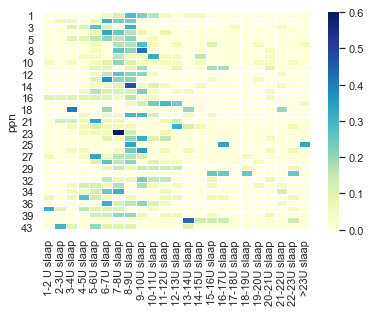

In [228]:
sns.heatmap(slaap_waak_count_wide, cmap="YlGnBu", linewidths=.1)

Dit kan nu vergeleken worden met het gemiddeld aantal uur slaap dat ze zelf aangegeven. Hier zie je dus hoeveel ze meestal geslapen hebben. 

#### op groepsniveau

Dit kan nu ook nog eens op groepsniveau bekeken worden (dus over alle participanten heen).

In [234]:
slaap_waak_count = slaap_waak_select.groupby(["Uurslaap_categ"]).count()
slaap_waak_count = slaap_waak_count.reset_index()
slaap_waak_count = slaap_waak_count[["Uurslaap_categ", "ppn"]]

Nu moet je het totaal aantal slaapmomenten van alle participanten (kan verschillen onderling) berekenen om straks te proportie te kunnen berekenen. 

In [237]:
u = slaap_waak_count["ppn"].sum()
u

571

In [238]:
slaap_waak_count["proportie"] = slaap_waak_count["ppn"]/u

In [240]:
slaap_waak_count.to_excel("group_slaap_waak.xlsx")

Dit moet nu gepivoteerd worden naar wide format.

In [252]:
slaap_waak_count_wide = slaap_waak_count.pivot(columns="Uurslaap_categ", values="proportie")
slaap_waak_count_wide

Uurslaap_categ,1-2 U slaap,2-3U slaap,3-4U slaap,4-5U slaap,5-6U slaap,6-7U slaap,7-8U slaap,8-9U slaap,9-10U slaap,10-11U slaap,...,14-15U slaap,15-16U slaap,16-17U slaap,17-18U slaap,18-19U slaap,19-20U slaap,20-21U slaap,21-22U slaap,22-23U slaap,>23U slaap
0,0.019264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.017513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.031524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.042032,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.091068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.115587,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.138354,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115587,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
slaap_waak_count_wide = np.diagonal(slaap_waak_count_wide)
slaap_waak_count_wide

array([0.01926445, 0.01751313, 0.03152364, 0.04203152, 0.0910683 ,
       0.11558669, 0.13835377, 0.15411559, 0.11558669, 0.06129597,
       0.04378284, 0.0385289 , 0.01926445, 0.01401051, 0.02101576,
       0.01050788, 0.00175131, 0.00525394, 0.00875657, 0.01751313,
       0.01401051, 0.01401051, 0.00525394])

Dit moet nu in een heat map geplaatst worden. 

In [248]:
slaap_waak_count_wide = pd.DataFrame(slaap_waak_count_wide)

In [253]:
slaap_waak_count_wide.to_excel("slaap.xlsx")

In [254]:
slaap_groep = pd.read_excel("C:/Users/beheerder/slaap.xlsx")

In [255]:
slaap_groep

,1-2 U slaap,2-3U slaap,3-4U slaap,4-5U slaap,5-6U slaap,6-7U slaap,7-8U slaap,8-9U slaap,9-10U slaap,10-11U slaap,...,14-15U slaap,15-16U slaap,16-17U slaap,17-18U slaap,18-19U slaap,19-20U slaap,20-21U slaap,21-22U slaap,22-23U slaap,>23U slaap
proportie,0.019264,0.017513,0.031524,0.042032,0.091068,0.115587,0.138354,0.154116,0.115587,0.061296,...,0.014011,0.021016,0.010508,0.001751,0.005254,0.008757,0.017513,0.014011,0.014011,0.005254


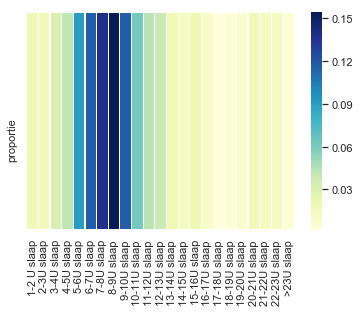

In [256]:
sns.heatmap(slaap_groep, cmap="YlGnBu", linewidths=.1)

In [260]:
slaap_waak_groep = slaap_waak_count[["Uurslaap_categ","proportie"]]
slaap_waak_groep.set_index("Uurslaap_categ", inplace=True)
slaap_waak_groep

,proportie
Uurslaap_categ,
1-2 U slaap,0.019264
2-3U slaap,0.017513
3-4U slaap,0.031524
4-5U slaap,0.042032
5-6U slaap,0.091068
6-7U slaap,0.115587
7-8U slaap,0.138354
8-9U slaap,0.154116
9-10U slaap,0.115587


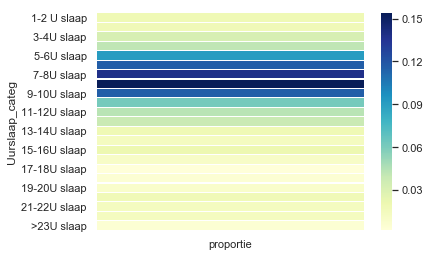

In [261]:
sns.heatmap(slaap_waak_groep, cmap="YlGnBu", linewidths=.1)

##### Dit kan dan straks ook vergeleken worden met de uren slaap die de mensen gemiddeld aangeven in de vragenlijst. 

Is al aangepast in qualtricsoriginal.xlsx. 
Kan dan vergeleken worden op het niveau van de persoon en op het groepsniveau( over de personen heen)

HEEL VEEL AANVULLINGEN NODIG:
    <ul> 
        <li> Week/weekend </li>
        <li> minuten voor het slapengaan wegleggen en teruggebruiken? </li>
        <li> ... </li>
    </ul>